In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
from matplotlib import pyplot as plt
import random
%matplotlib inline

## linear regression

In [3]:
num_inputs = 2
num_examples = 1000
features = tf.random.normal((num_examples, num_inputs),stddev = 1)

In [4]:
true_w = [2, -3.4]
true_b = 4.2
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b

In [5]:
labels += tf.random.normal(labels.shape,stddev=0.01)

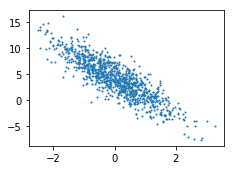

In [7]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
#     use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)

In [8]:
# initial weights
w = tf.Variable(tf.random.normal(shape=(num_inputs,1), stddev=0.01, dtype=tf.float32))
b = tf.Variable(tf.zeros(1,))

In [9]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.00525716],
       [ 0.00699705]], dtype=float32)>

In [10]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [11]:
# model
def linreg(X, w, b):
    return tf.matmul(X, w) + b

# loss
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 /2

# sgd
def sgd(params, lr, batch_size):
    for param in params:
#         param[:] = param - lr * t.gradient(l, param) / batch_size
        param.assign_sub(lr * t.gradient(l, param) / batch_size)

In [17]:
import numpy as np

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [27]:
def data_iter(batch_size, features, labels):
    features = np.array(features)
    labels = np.array(labels)
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i:min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [28]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

[[-1.2199459  -0.8411994 ]
 [-1.0434545  -0.44095033]
 [-0.85273004  2.8508554 ]
 [ 0.08490641  0.46026024]
 [-2.4537492  -0.2997476 ]
 [ 0.871864   -0.34927326]
 [ 2.1584451  -0.23294072]
 [ 1.6587548   0.44417784]
 [ 0.1376348   0.30256218]
 [-0.77197826 -0.49520046]] [ 4.61954     3.6139417  -7.198632    2.7920113   0.32131273  7.1403456
  9.289755    6.017725    3.435762    4.3334584 ]


In [29]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape(persistent=True) as t:
            t.watch([w,b])
            l = loss(net(X, w, b), y)
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

epoch 1, loss 0.046836
epoch 2, loss 0.000211
epoch 3, loss 0.000052


## 编外

In [19]:
def data_iter(batch_size, features, labels):
    features = np.array(features)
    labels = np.array(labels)
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i:min(i + batch_size, num_examples)])
        print("batch:%d" % i)
        print(features[j], labels[j])

In [23]:
data_iter(2, [[1,2],[2,3],[-1,-2],[-2,-3]], [0,1,1,1])

batch:0
[[-2 -3]
 [-1 -2]] [1 1]
batch:2
[[1 2]
 [2 3]] [0 1]


In [24]:
def data_iter(batch_size, features, labels):
    features = np.array(features)
    labels = np.array(labels)
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i:(i + batch_size)])
        print("batch:%d" % i)
        print(features[j], labels[j])

In [25]:
data_iter(2, [[1,2],[2,3],[-1,-2],[-2,-3]], [0,1,1,1])

batch:0
[[ 1  2]
 [-1 -2]] [0 1]
batch:2
[[ 2  3]
 [-2 -3]] [1 1]


In [30]:
x = tf.Variable(tf.ones(shape=(2,3)))

In [31]:
x

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [33]:
x.assign_sub(0.5*tf.ones(shape=(2,3)))

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5]], dtype=float32)>

In [34]:
x

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5]], dtype=float32)>